In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    return mu, var

In [3]:
def gaussian_prob(X, mu, var):
    p = np.exp(- ((X - mu) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)
    return np.prod(p, axis=1)

In [4]:
# Step 3: Select Threshold using Cross-validation set
def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_f1 = 0

    step = (max(p_val) - min(p_val)) / 1000
    for epsilon in np.arange(min(p_val), max(p_val), step):
        preds = (p_val < epsilon)
        tp = np.sum((preds == 1) & (y_val == 1))
        fp = np.sum((preds == 1) & (y_val == 0))
        fn = np.sum((preds == 0) & (y_val == 1))

        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1 = 2 * precision * recall / (precision + recall + 1e-8)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1


In [5]:

# Step 4: Apply Anomaly Detection
def detect_anomalies(X_train, X_val, y_val):
    mu, var = estimate_gaussian(X_train)
    p_train = gaussian_prob(X_train, mu, var)
    p_val = gaussian_prob(X_val, mu, var)

    epsilon, f1 = select_threshold(y_val, p_val)
    anomalies = X_train[p_train < epsilon]

    return anomalies, epsilon, f1

In [6]:
# ---- Example with Synthetic Data ----
# Generate normal data
np.random.seed(0)
X_normal = np.random.normal(0, 1, (1000, 2))

In [7]:

# Add anomalies
X_anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
X_train = np.vstack([X_normal, X_anomalies])
y_val = np.hstack([np.zeros(1000), np.ones(20)])

In [8]:
# Shuffle for validation set
perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
y_val = y_val[perm]

In [9]:
# Detect anomalies
anomalies, epsilon, f1 = detect_anomalies(X_train, X_train, y_val)

In [10]:
print(f"Threshold (epsilon): {epsilon}")
print(f"F1 Score: {f1:.4f}")
print(f"Number of Anomalies Detected: {len(anomalies)}")

Threshold (epsilon): 0.0005450395880269094
F1 Score: 0.9189
Number of Anomalies Detected: 17


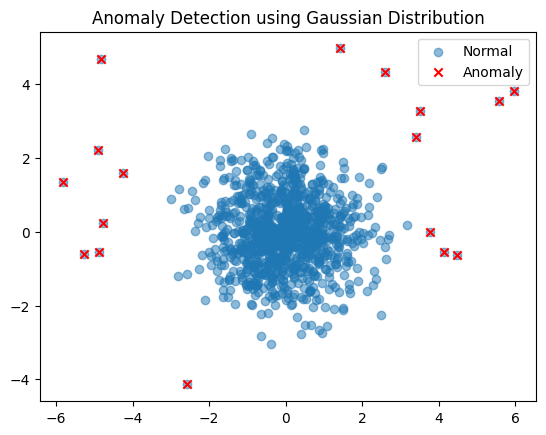

In [11]:
# Visualization
plt.scatter(X_train[:, 0], X_train[:, 1], label='Normal', alpha=0.5)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', label='Anomaly', marker='x')
plt.title("Anomaly Detection using Gaussian Distribution")
plt.legend()
plt.show()